<a href="https://colab.research.google.com/github/Michael-AI-ML/fairness/blob/main/McCarthy_Fair_V6_French.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MetaData

*Coding and model development by* Michael B. McCarthy mbmccart@utica.edu

Article Title : Fairness–accuracy tradeoff: activation function choice in a neural network

DOI : 10.1007/s43681-022-00250-9

AIET-D-22-00158R1

in 

*AI and Ethics*

By 

Michael B. McCarthy

and

Sundaraparipurnan Narayanan  

sundar.narayanan@aitechethics.com

This is built for Google's cloud-based Colab.  A libraries are !pip installed for each run.

Data stored in Google Drive.

V2 on 02Nov2021

V3 on 16NOV2021

V4 on 29NOV2021

V5, Added random seed control.  

V6 Stable and used for experiments. 

## Google Drive File

In [ ]:
#https://pypi.org/project/PyDrive/
import time
start = time.time()
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
end = time.time()
print("The time of execution of above program is :", end-start)

The time of execution of above program is : 9.661772012710571


In [ ]:
start = time.time() #to meausure how long it takes

#authenticate users to have acces to google Drive.  Click the link to get the code.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

end = time.time()
print("The time of execution of above program is :", end-start)

The time of execution of above program is : 15.447955131530762


## Library Loading

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
#It is a function that renders the figure in a notebook (instead of displaying a dump of the figure object).
%matplotlib inline
# To remove the scientific notation from numpy arrays
#np.set_printoptions(suppress=True)

#Setting Seed for reproducable results (important to have tensorflow random seed set as well)
#https://datascience.stackexchange.com/questions/13314/causes-of-inconsistent-results-with-neural-network
np.random.seed(1)

# package for descriptive statistics
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Get the file
##data wrangled outside this Python notebook via Alteryx Designer. 

# Source: Mabilama, J. M. (2020). E-commerce - Users of a C2C fashion store. [online] Data.world. 
# Available at: https://data.world/jfreex/e-commerce-users-of-a-french-c2c-fashion-store 
# Target Variable made for transactions (items bought or sold)
# outliers removed at 3 standard deviations above the mean
# Target Variable made for transactions (items bought or sold)
# outliers removed at 3 standard deviations above the mean
#   
#French Data Stratified Random Sample Jan 05, 2022 Random SEED == 47
"""
downloaded = drive.CreateFile({'id':'1BRlzi6jETpw66sDGB5Dhf53CkLp1zPtu'}) # replace the id with id of file you want to access
downloaded.GetContentFile('FrenchC2Train1.csv') 
downloaded = drive.CreateFile({'id':'1P-Z4qCWjuOyEOmoXRhZI6TpTnzNaPukL'}) # replace the id with id of file you want to access
downloaded.GetContentFile('FrenchC2CTEST1.csv')
"""
#French Data Stratified Random Sample Jan 10, 2022 Random SEED == 67
downloaded = drive.CreateFile({'id':'1mOjfbmr7Vk3YqwpdbKlvfnXfMp1A8gJb'}) # replace the id with id of file you want to access
downloaded.GetContentFile('FrenchC2Train2.csv') 
downloaded = drive.CreateFile({'id':'1jVMKvdJVswMJj9S9wqSdWdoYw9IF_-XH'}) # replace the id with id of file you want to access
downloaded.GetContentFile('FrenchC2CTEST2.csv')

In [ ]:
## read the training file

dfTrain = pd.read_csv('FrenchC2Train2.csv') 
print("Training Data: ",dfTrain.shape)

## read the TEST file
dfTEST = pd.read_csv("FrenchC2CTEST2.csv")
print("Testing Data: ",dfTEST.shape)

## show a sample of n records
#dfTrain.sample(10)
#dfTEST.sample(10)
del dfTrain['RecordID']  #"RecordID" included in dataset but removed because not variable in the analysis
del dfTEST['RecordID']   #"RecordID" included in dataset but removed because not variable in the analysis
## show the top 5 for Train
print("\n Training Data \n")
print(dfTrain.head())
#Displace the varaible types for Train
print(dfTrain.dtypes)
print(dfTrain.shape)
## show the top 5 for Testing
print("\n Testing Data \n")
print(dfTEST.head())
#Displace the varaible types for Testing
print(dfTEST.dtypes)
print(dfTEST.shape)

Training Data:  (68976, 20)
Testing Data:  (29562, 20)

 Training Data 

   daysSinceLastLogin  productsListed  productsPassRate  productsWished  \
0            0.000947             0.0               0.0             0.0   
1            0.000947             0.0               0.0             0.0   
2            0.000936             0.0               0.0             0.0   
3            0.000947             0.0               0.0             0.0   
4            0.000947             0.0               0.0             0.0   

   seniorityAsMonths  socialNbFollowers  socialNbFollows  socialProductsLiked  \
0                1.0                0.0          0.06015                  0.0   
1                1.0                0.0          0.06015                  0.0   
2                1.0                0.0          0.06015                  0.0   
3                1.0                0.0          0.06015                  0.0   
4                1.0                0.0          0.06015               

In [ ]:
#install fairlearn
#if installing on a local IDE (e.g., Jupyter), do not use the exclamation point 
!pip install fairlearn
#install modeling packages
!pip install tensorflow
!pip install -U scikit-learn
!pip install keras
import sklearn as sk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 7.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 8.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data File Wrangle

In [ ]:
# Separate Target Variable and Predictor Variables
# define variable to class: Churn
#"transact" is a dictomous variable used to identify customers who stop using the company's services
TargetVariable=["transact"]
#it is VERY important that the list of variables matches the left to right order in the CSVs!
PredictorVariables=["daysSinceLastLogin","productsListed","productsPassRate", "productsWished", "seniorityAsMonths",
                    "socialNbFollowers","socialNbFollows","socialProductsLiked","language_de", "language_en",
                    "language_es", "language_fr","language_it", "hasAnyApp","hasAndroidApp","hasIosApp", "hasProfilePicture","Gender_Byte"]
#NumericalPredictorVariables=["tenure","MonthlyCharges","TotalCharges"]

## Descriptive Statistics

In [ ]:
print("dfTrain Predictor Variables")
rp.summary_cont(dfTrain[PredictorVariables])

dfTrain Predictor Variables




,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,daysSinceLastLogin,68976.0,0.0009,0.0108,0.0000,0.0008,0.0010
1,productsListed,68976.0,0.0028,0.0322,0.0001,0.0026,0.0031
2,productsPassRate,68976.0,0.0057,0.0717,0.0003,0.0052,0.0063
3,productsWished,68976.0,0.0007,0.0097,0.0000,0.0006,0.0008
4,seniorityAsMonths,68976.0,0.6007,0.4769,0.0018,0.5972,0.6043
5,socialNbFollowers,68976.0,0.0073,0.0346,0.0001,0.0070,0.0075
6,socialNbFollows,68976.0,0.0609,0.0102,0.0000,0.0608,0.0609
7,socialProductsLiked,68976.0,0.0006,0.0071,0.0000,0.0005,0.0006
8,language_de,68976.0,0.0726,0.2595,0.0010,0.0707,0.0745
9,language_en,68976.0,0.5217,0.4995,0.0019,0.5180,0.5255


In [ ]:
print("dfTrain Target Variable")
rp.summary_cont(dfTrain[TargetVariable])

dfTrain Target Variable




,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,transact,68976.0,0.0654,0.2472,0.0009,0.0636,0.0672


In [ ]:
print("dfTEST Predictor Variables")
rp.summary_cont(dfTEST[PredictorVariables])

dfTEST Predictor Variables




,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,daysSinceLastLogin,29562.0,0.0008,0.0082,0.0000,0.0008,0.0009
1,productsListed,29562.0,0.0032,0.0359,0.0002,0.0028,0.0037
2,productsPassRate,29562.0,0.0061,0.0739,0.0004,0.0053,0.0070
3,productsWished,29562.0,0.0008,0.0100,0.0001,0.0006,0.0009
4,seniorityAsMonths,29562.0,0.5982,0.4774,0.0028,0.5927,0.6036
5,socialNbFollowers,29562.0,0.0081,0.0388,0.0002,0.0076,0.0085
6,socialNbFollows,29562.0,0.0608,0.0080,0.0000,0.0607,0.0609
7,socialProductsLiked,29562.0,0.0006,0.0065,0.0000,0.0005,0.0007
8,language_de,29562.0,0.0727,0.2596,0.0015,0.0697,0.0757
9,language_en,29562.0,0.5214,0.4995,0.0029,0.5157,0.5271


In [ ]:
print("dfTEST Target Variable")
rp.summary_cont(dfTEST[TargetVariable])

dfTEST Target Variable




,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,transact,29562.0,0.068,0.2518,0.0015,0.0652,0.0709


In [ ]:
"""Normally, random samples using 'from sklearn.model_selection import train_test_split'
identify training and testing data but, for repeatablility,
a static random stratified sample was made."""
#Training Data for X and y
X_train = dfTrain.drop('transact',axis='columns')
print("X_Train Shape:\n",X_train.shape, "\n")
print("X_train head:\n")
print(X_train.head())
y_train = dfTrain['transact']
print("y_train shape: \n",y_train.shape, "\n")
print("y_train head:\n")
print(y_train.head())

# Testing Data for X and y
X_test = dfTEST.drop('transact',axis='columns')
print("\nX_test shape: \n",X_test.shape,"\n")
print("X_test head:\n")
print(X_test.head())

y_test = dfTEST['transact']
print("y_test Shape:",y_test.shape,"\n")
print("y_test Head:\n")
print(y_test.head())

# Check shapes of training and testing datasets
assert(X_train.shape==(68976, 18))
assert(X_test.shape == (29562, 18))
print(X_train.shape)
print(X_test.shape)

#training data are rank one arrays that need to be reshaped 
y_train=y_train.values.reshape((68976,1))
y_test=y_test.values.reshape((29562,1))
print(y_train.shape)
print(y_test.shape)


X_Train Shape:
 (68976, 18) 

X_train head:

   daysSinceLastLogin  productsListed  productsPassRate  productsWished  \
0            0.000947             0.0               0.0             0.0   
1            0.000947             0.0               0.0             0.0   
2            0.000936             0.0               0.0             0.0   
3            0.000947             0.0               0.0             0.0   
4            0.000947             0.0               0.0             0.0   

   seniorityAsMonths  socialNbFollowers  socialNbFollows  socialProductsLiked  \
0                1.0                0.0          0.06015                  0.0   
1                1.0                0.0          0.06015                  0.0   
2                1.0                0.0          0.06015                  0.0   
3                1.0                0.0          0.06015                  0.0   
4                1.0                0.0          0.06015                  0.0   

   language_de  l

In [ ]:
print("\n X_test head: \n")
X_test.head()


 X_test head: 



,daysSinceLastLogin,productsListed,productsPassRate,productsWished,seniorityAsMonths,socialNbFollowers,socialNbFollows,socialProductsLiked,language_de,language_en,language_es,language_fr,language_it,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,Gender_Byte
0,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0,1,0,0,0,0,0,0,1,1
1,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,1,0,0,0,0,0,0,0,1,1
2,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0,1,0,0,0,0,0,0,1,1
3,0.000787,0.0,0.0,0.0,1.0,0.0,0.06015,0.000783,0,1,0,0,0,0,0,0,1,1
4,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0,1,0,0,0,0,0,0,1,1


In [ ]:
print("\n X_train head: \n")
X_train.head()


 X_train head: 



,daysSinceLastLogin,productsListed,productsPassRate,productsWished,seniorityAsMonths,socialNbFollowers,socialNbFollows,socialProductsLiked,language_de,language_en,language_es,language_fr,language_it,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,Gender_Byte
0,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.0,0,1,0,0,0,0,0,0,1,1
1,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.0,0,0,0,1,0,1,1,0,1,1
2,0.000936,0.0,0.0,0.0,1.0,0.0,0.06015,0.0,0,0,0,1,0,1,1,0,1,1
3,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.0,0,1,0,0,0,0,0,0,1,1
4,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.0,0,1,0,0,0,0,0,0,1,1


In [ ]:
"""

#Correlation Matrix
#This is currently run on only the X variables but should include the whole dataset (i.e., include the Y variable...the dependent variable)
start = time.time() #to meausure how long it takes
#this takes a long time....consider commenting out once you see the results.
sns.pairplot(data=X_train, hue="Gender_Byte")
plt.show() 

end = time.time()
print("\nThe time of execution of above program is :", end-start,"\n")

"""

'\n\n#Correlation Matrix\n#This is currently run on only the X variables but should include the whole dataset (i.e., include the Y variable...the dependent variable)\nstart = time.time() #to meausure how long it takes\n#this takes a long time....consider commenting out once you see the results.\nsns.pairplot(data=X_train, hue="Gender_Byte")\nplt.show() \n\nend = time.time()\nprint("\nThe time of execution of above program is :", end-start,"\n")\n\n'

# Activation Function Bias Analysis with FairLearn
The Prupose of this code is to assess the technical bias resulting from the 
activation function used in the **hidden** layer of a Neural Network

# Modeling

In [ ]:
#Modeling
import tensorflow as tf
#
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# Set the random seed for repeatable results (important to have numpy random seed set as well)
tf.random.set_seed(1)
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score

from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate,false_positive_rate,true_positive_rate,count

#Identifying the initializer used in each layer; seed set to 4 to a Python integer. 
# "An initializer created with a given seed will always produce the same random tensor for a given shape and dtype." 
# https://keras.io/api/layers/initializers/#randomnormal-class
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=4)

## Relu Activation Function
rectified linear unit activation = ReLU

https://keras.io/api/layers/activations/#relu-function

Epoch 1/30
270/270 [==============================] - 1s 2ms/step - loss: 1.2121 - accuracy: 0.6804
Epoch 2/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2928 - accuracy: 0.9297
Epoch 3/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2618 - accuracy: 0.9392
Epoch 4/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2456 - accuracy: 0.9399
Epoch 5/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2320 - accuracy: 0.9401
Epoch 6/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2223 - accuracy: 0.9404
Epoch 7/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2161 - accuracy: 0.9405
Epoch 8/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2100 - accuracy: 0.9409
Epoch 9/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2051 - accuracy: 0.9414
Epoch 10/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2024 - accuracy: 0.9419

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23a9ea6850>,
      dtype=object)

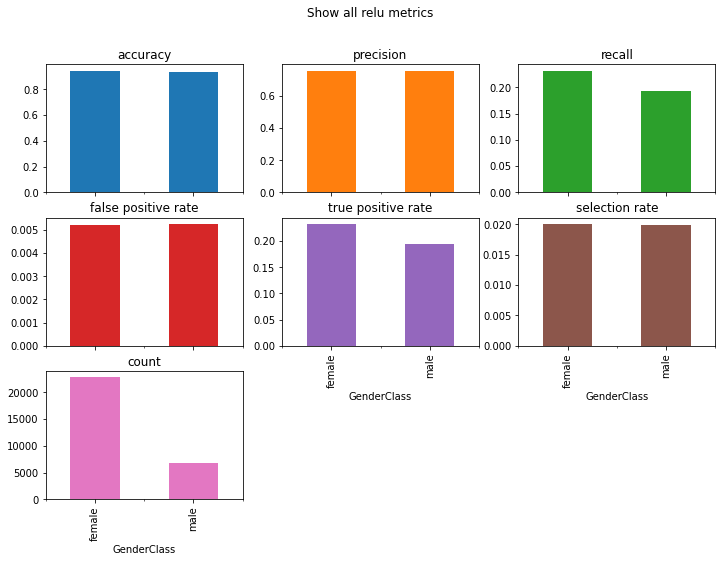

In [ ]:
# create ANN model https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/ 
### relu Activation function in all layers and sigmoid in output layer ###
model_relu = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model_relu.add(Dense(19, input_shape=(18,), kernel_initializer=initializer, bias_initializer="zeros", activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_relu.add(Dense(units=5, kernel_initializer=initializer, bias_initializer="zeros", activation='relu'))
 
# The output neuron is a single fully connected node 
#
model_relu.add(Dense(1, kernel_initializer=initializer,activation='sigmoid'))
 
# Compiling the model
model_relu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Fitting the ANN to the Training set
model_relu.fit(X_train, y_train, batch_size = 256, epochs = 30, verbose=1)

# Generating Predictions on testing data
Predictions_relu=model_relu.predict(X_test)

TestingData=pd.DataFrame(data=X_test.values, columns=PredictorVariables)
#TestingData.insert(len(df.columns), 'Churn', y_test.values)
#TestingData.assign(Churn=y_test)
TestingData["transact"]=y_test
TestingData['PredictedtransactRelu']=Predictions_relu

#transform Predicted transact from decimal to 0 or 1 for Confusion Matrix & insert into Fairlearn
TestingData["PredictedtransactReluClass"]= np.where(TestingData['PredictedtransactRelu']>=0.5, 1, 0)
#print(y_test[:10])
print(y_test.dtype)
print(TestingData.sample(11))
model_relu.evaluate(X_test, y_test)

#Fairlearn https://fairlearn.org/v0.7.0/quickstart.html
gm_relu = MetricFrame(metrics=accuracy_score, y_true=TestingData['transact'], y_pred=TestingData['PredictedtransactReluClass'], sensitive_features=TestingData['Gender_Byte'])
print("\n")
print("Model score: ")
print(gm_relu.overall)

print("\n" "Model score by category: ")
print(gm_relu.by_group)
print(' Remember, from data wrangling, IF [Gender_Byte]="female" THEN "1" ELSE "0" ENDIF" \n')

#FairLearn Metrics
sr_relu = MetricFrame(metrics=selection_rate,y_true=TestingData['transact'], y_pred=TestingData['PredictedtransactReluClass'], sensitive_features=TestingData['Gender_Byte'])
sr_relu.overall
print("1.0==female, 0.0==male")
sr_relu.by_group
#transform Sensative Varible from 0 or 1 to "male" or "female" for plotting
TestingData["GenderClass"]= np.where(TestingData['Gender_Byte']==1, "female","male")
#print(TestingData.head)
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame_relu = MetricFrame(metrics=metrics,
                           y_true=TestingData['transact'],
                           y_pred=TestingData['PredictedtransactReluClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_relu.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all relu metrics",
)


In [ ]:
print("\n X_test head: \n")
TestingData.head()


 X_test head: 



,daysSinceLastLogin,productsListed,productsPassRate,productsWished,seniorityAsMonths,socialNbFollowers,socialNbFollows,socialProductsLiked,language_de,language_en,language_es,language_fr,language_it,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,Gender_Byte,transact,PredictedtransactRelu,PredictedtransactReluClass,GenderClass
0,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035623,0,female
1,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.057118,0,female
2,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035623,0,female
3,0.000787,0.0,0.0,0.0,1.0,0.0,0.06015,0.000783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.036469,0,female
4,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035623,0,female


## Tanh Activation Function

Hyperbolic tangent activation function.

https://keras.io/api/layers/activations/#tanh-function

Epoch 1/30
270/270 [==============================] - 1s 2ms/step - loss: 1.1264 - accuracy: 0.4428
Epoch 2/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2482 - accuracy: 0.9332
Epoch 3/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9366
Epoch 4/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2214 - accuracy: 0.9382
Epoch 5/30
270/270 [==============================] - 1s 3ms/step - loss: 0.2175 - accuracy: 0.9392
Epoch 6/30
270/270 [==============================] - 1s 3ms/step - loss: 0.2133 - accuracy: 0.9401
Epoch 7/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2096 - accuracy: 0.9407
Epoch 8/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2062 - accuracy: 0.9414
Epoch 9/30
270/270 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9418
Epoch 10/30
270/270 [==============================] - 1s 2ms/step - loss: 0.1998 - accuracy: 0.9417

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23a5d10850>,
      dtype=object)

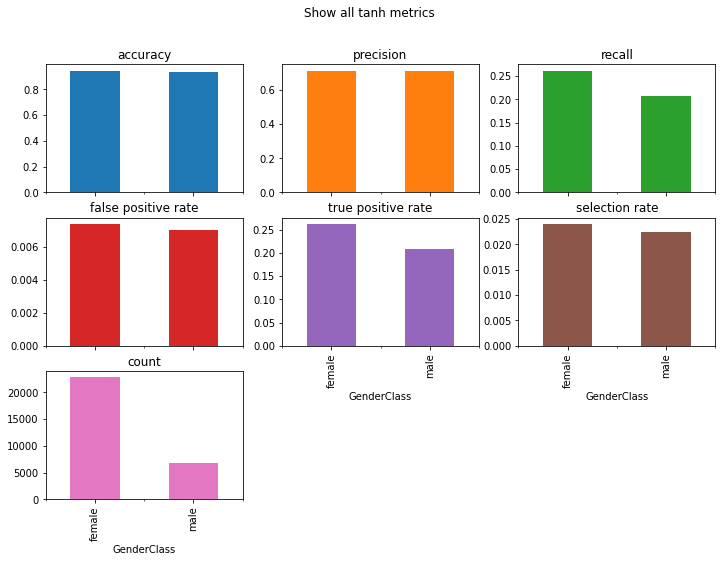

In [ ]:
# create ANN model https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/ 
### tanh Activation function in all layers and sigmoid in output layer ###
model_tanh = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model_tanh.add(Dense(19, input_shape=(18,), kernel_initializer=initializer, bias_initializer="zeros", activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_tanh.add(Dense(units=5, kernel_initializer=initializer, bias_initializer="zeros",activation='tanh'))
 
# The output neuron is a single fully connected node 
#
model_tanh.add(Dense(1, kernel_initializer=initializer,activation='sigmoid'))
 
# Compiling the model
model_tanh.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Fitting the ANN to the Training set
model_tanh.fit(X_train, y_train ,batch_size = 256, epochs = 30, verbose=1)

# Generating Predictions on testing data
Predictions_tanh=model_tanh.predict(X_test)

#TestingData=pd.DataFrame(data=X_test.values, columns=PredictorVariables)
#TestingData['transact']=y_test.values
TestingData['PredictedtransactTanh']=Predictions_tanh

#transform Predicted transact from decimal to 0 or 1 for Confusion Matrix & insert into Fairlearn
TestingData["PredictedtransactTanhClass"]= np.where(TestingData['PredictedtransactTanh']>=0.5, 1, 0)
print(y_test.dtype)
print(TestingData.sample(11))
model_tanh.evaluate(X_test, y_test)

#Fairlearn https://fairlearn.org/v0.7.0/quickstart.html
gm_tanh = MetricFrame(metrics=accuracy_score, y_true=TestingData['transact'], y_pred=TestingData['PredictedtransactTanhClass'], sensitive_features=TestingData['Gender_Byte'])
print("\n")
print("Model score: ")
print(gm_tanh.overall)

print("\n" "Model score by category: ")
print(gm_tanh.by_group)
print(' Remember, from data wrangling, IF [Gender_Byte]="female" THEN "1" ELSE "0" ENDIF" \n')

#FairLearn Metrics
sr_tanh = MetricFrame(metrics=selection_rate,y_true=TestingData['transact'], y_pred=TestingData['PredictedtransactTanhClass'], sensitive_features=TestingData['Gender_Byte'])
sr_tanh.overall
print("1.0==female, 0.0==male")
sr_tanh.by_group
#transform Sensative Varible from 0 or 1 to "male" or "female" for plotting
#TestingData["GenderClass"]= np.where(TestingData['gender']>=1, "female","male")
#print(TestingData.head)
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame_tanh = MetricFrame(metrics=metrics,
                           y_true=TestingData['transact'],
                           y_pred=TestingData['PredictedtransactTanhClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_tanh.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all tanh metrics",
)

In [ ]:
print("\n X_test head: \n")
TestingData.head()


 X_test head: 



,daysSinceLastLogin,productsListed,productsPassRate,productsWished,seniorityAsMonths,socialNbFollowers,socialNbFollows,socialProductsLiked,language_de,language_en,language_es,language_fr,language_it,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,Gender_Byte,transact,PredictedtransactRelu,PredictedtransactReluClass,GenderClass,PredictedtransactTanh,PredictedtransactTanhClass
0,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0
1,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.057107,0,female,0.036658,0
2,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0
3,0.000787,0.0,0.0,0.0,1.0,0.0,0.06015,0.000783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.036482,0,female,0.026779,0
4,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0


## Selu Activation Function

Scaled Exponential Linear Unit (SELU).

https://keras.io/api/layers/activations/#selu-function

Epoch 1/30
270/270 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.8750
Epoch 2/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.9281
Epoch 3/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2322 - accuracy: 0.9334
Epoch 4/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2243 - accuracy: 0.9358
Epoch 5/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2182 - accuracy: 0.9367
Epoch 6/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2135 - accuracy: 0.9380
Epoch 7/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2094 - accuracy: 0.9391
Epoch 8/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2058 - accuracy: 0.9403
Epoch 9/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2024 - accuracy: 0.9411
Epoch 10/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2000 - accuracy: 0.9418

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23a98bef50>,
      dtype=object)

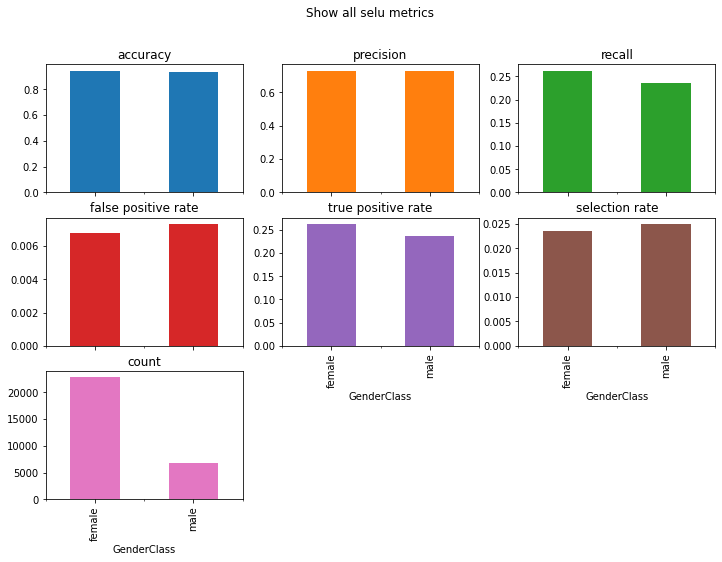

In [ ]:
# create ANN model https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/
### Selu Activation function in all layers and sigmoid in output layer ###
model_selu = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model_selu.add(Dense(19, input_shape=(18,), kernel_initializer=initializer, bias_initializer="zeros", activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_selu.add(Dense(units=5, kernel_initializer=initializer, bias_initializer="zeros", activation='selu'))
 
# The output neuron is a single fully connected node 
#
model_selu.add(Dense(1, kernel_initializer=initializer,activation='sigmoid'))
 
# Compiling the model
model_selu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Fitting the ANN to the Training set
model_selu.fit(X_train, y_train ,batch_size = 256, epochs = 30, verbose=1)

# Generating Predictions on testing data
Predictions_selu=model_selu.predict(X_test)

#TestingData=pd.DataFrame(data=X_test.values, columns=PredictorVariables)
#TestingData['transact']=y_test.values
TestingData['PredictedtransactSelu']=Predictions_selu

#transform Predicted transact from decimal to 0 or 1 for Confusion Matrix & insert into Fairlearn
TestingData["PredictedtransactSeluClass"]= np.where(TestingData['PredictedtransactSelu']>=0.5, 1, 0)
print(y_test.dtype)
print(TestingData.sample(11))
model_selu.evaluate(X_test, y_test)

#Fairlearn https://fairlearn.org/v0.7.0/quickstart.html
gm_selu = MetricFrame(metrics=accuracy_score, y_true=TestingData['transact'], y_pred=TestingData['PredictedtransactSeluClass'], sensitive_features=TestingData['Gender_Byte'])
print("\n")
print("Model score: ")
print(gm_selu.overall)

print("\n" "Model score by category: ")
print(gm_selu.by_group)
print(' Remember, from data wrangling, IF [Gender_Byte]="female" THEN "1" ELSE "0" ENDIF" \n')

#FairLearn Metrics
sr_selu = MetricFrame(metrics=selection_rate,y_true=TestingData['transact'], y_pred=TestingData['PredictedtransactSeluClass'], sensitive_features=TestingData['Gender_Byte'])
sr_selu.overall
print("1.0==female, 0.0==male")
sr_selu.by_group
#transform Sensative Varible from 0 or 1 to "male" or "female" for plotting
#TestingData["GenderClass"]= np.where(TestingData['Gender_Byte']>=1, "female","male")
#print(TestingData.head)
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame_selu = MetricFrame(metrics=metrics,
                           y_true=TestingData['transact'],
                           y_pred=TestingData['PredictedtransactSeluClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_selu.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all selu metrics",
)

In [ ]:
print("\n X_test head: \n")
TestingData.head()


 X_test head: 



,daysSinceLastLogin,productsListed,productsPassRate,productsWished,seniorityAsMonths,socialNbFollowers,socialNbFollows,socialProductsLiked,language_de,language_en,language_es,language_fr,language_it,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,Gender_Byte,transact,PredictedtransactRelu,PredictedtransactReluClass,GenderClass,PredictedtransactTanh,PredictedtransactTanhClass,PredictedtransactSelu,PredictedtransactSeluClass
0,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0
1,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.057107,0,female,0.036658,0,0.043551,0
2,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0
3,0.000787,0.0,0.0,0.0,1.0,0.0,0.06015,0.000783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.036482,0,female,0.026779,0,0.028357,0
4,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0


## Elu Activation Function

Exponential Linear Unit.

https://keras.io/api/layers/activations/#elu-function

Epoch 1/30
270/270 [==============================] - 1s 2ms/step - loss: 1.2942 - accuracy: 0.6166
Epoch 2/30
270/270 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.9117
Epoch 3/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2365 - accuracy: 0.9381
Epoch 4/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2204 - accuracy: 0.9399
Epoch 5/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2135 - accuracy: 0.9411
Epoch 6/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2095 - accuracy: 0.9417
Epoch 7/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2066 - accuracy: 0.9423
Epoch 8/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2043 - accuracy: 0.9424
Epoch 9/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2023 - accuracy: 0.9426
Epoch 10/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2005 - accuracy: 0.9427

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23a0b6fa50>,
      dtype=object)

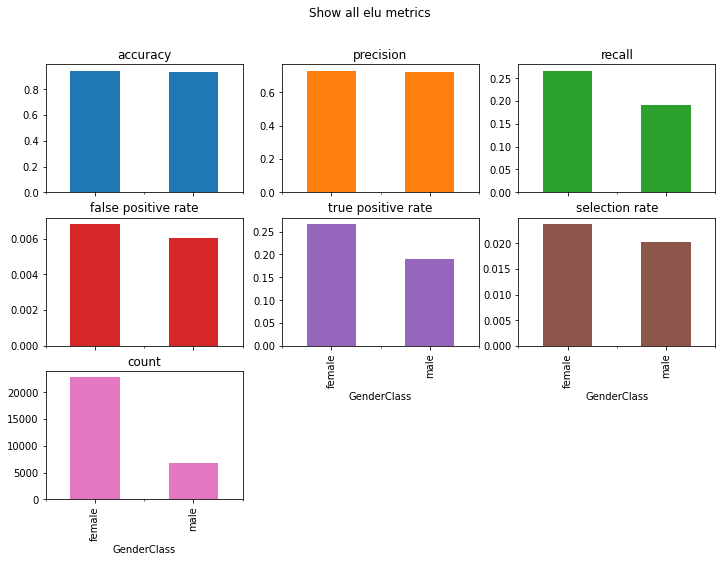

In [ ]:
# create ANN model https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/
### elu Activation function in all layers and sigmoid in output layer ###
model_elu = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model_elu.add(Dense(19, input_shape=(18,), kernel_initializer=initializer, bias_initializer="zeros", activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_elu.add(Dense(units=5, kernel_initializer=initializer, bias_initializer="zeros", activation='elu'))
 
# The output neuron is a single fully connected node 
#
model_elu.add(Dense(1, kernel_initializer=initializer, activation='sigmoid'))
 
# Compiling the model
model_elu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# Fitting the ANN to the Training set
model_elu.fit(X_train, y_train ,batch_size = 256, epochs = 30, verbose=1)

# Generating Predictions on testing data
Predictions_elu=model_elu.predict(X_test)

#TestingData=pd.DataFrame(data=X_test.values, columns=PredictorVariables)
#TestingData['transact']=y_test.values
TestingData['PredictedtransactElu']=Predictions_elu

#transform Predicted transact from decimal to 0 or 1 for Confusion Matrix & insert into Fairlearn
TestingData["PredictedtransactEluClass"]= np.where(TestingData['PredictedtransactElu']>=0.5, 1, 0)
print(y_test.dtype)
print(TestingData.sample(11))
model_elu.evaluate(X_test, y_test)

#Fairlearn https://fairlearn.org/v0.7.0/quickstart.html
gm_elu = MetricFrame(metrics=accuracy_score, y_true=TestingData['transact'], y_pred=TestingData['PredictedtransactEluClass'], sensitive_features=TestingData['Gender_Byte'])
print("\n")
print("Model score: ")
print(gm_elu.overall)

print("\n" "Model score by category: ")
print(gm_elu.by_group)
print(' Remember, from data wrangling, IF [Gender_Byte]="female" THEN "1" ELSE "0" ENDIF" \n')

#FairLearn Metrics
sr_elu = MetricFrame(metrics=selection_rate,y_true=TestingData['transact'], y_pred=TestingData['PredictedtransactEluClass'], sensitive_features=TestingData['Gender_Byte'])
sr_elu.overall
print("1.0==female, 0.0==male")
sr_elu.by_group
#transform Sensative Varible from 0 or 1 to "male" or "female" for plotting
#TestingData["GenderClass"]= np.where(TestingData['Gender_Byte']>=1, "female","male")
#print(TestingData.head)
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame_elu = MetricFrame(metrics=metrics,
                           y_true=TestingData['transact'],
                           y_pred=TestingData['PredictedtransactEluClass'],
                           sensitive_features=TestingData["GenderClass"])
metric_frame_elu.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all elu metrics",
)

In [ ]:
print("\n X_test head: \n")
TestingData.head()


 X_test head: 



,daysSinceLastLogin,productsListed,productsPassRate,productsWished,seniorityAsMonths,socialNbFollowers,socialNbFollows,socialProductsLiked,language_de,language_en,language_es,language_fr,language_it,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,Gender_Byte,transact,PredictedtransactRelu,PredictedtransactReluClass,GenderClass,PredictedtransactTanh,PredictedtransactTanhClass,PredictedtransactSelu,PredictedtransactSeluClass,PredictedtransactElu,PredictedtransactEluClass
0,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0,0.034608,0
1,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.057107,0,female,0.036658,0,0.043551,0,0.049436,0
2,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0,0.034608,0
3,0.000787,0.0,0.0,0.0,1.0,0.0,0.06015,0.000783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.036482,0,female,0.026779,0,0.028357,0,0.035453,0
4,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0,0.034608,0


# Fairlearn Metrics

## Overall Model Metrics

In [ ]:
print ("Relu\n", metric_frame_relu.overall, 
      "\n\nTanh\n", metric_frame_tanh.overall,
      "\n\nSelu\n", metric_frame_selu.overall,
      "\n\nElu\n", metric_frame_elu.overall,
      "\n\nExponential\n", metric_frame_exponential.overall,
      "\n")


Relu
 accuracy                 0.942223
precision                0.755481
recall                   0.222775
false positive rate    0.00526297
true positive rate       0.222775
selection rate          0.0200595
count                       29562
dtype: object 

Tanh
 accuracy                  0.94202
precision                0.711238
recall                   0.248633
false positive rate    0.00736815
true positive rate       0.248633
selection rate          0.0237805
count                       29562
dtype: object 

Selu
 accuracy                  0.9429
precision               0.729078
recall                  0.255594
false positive rate    0.0069326
true positive rate      0.255594
selection rate         0.0238482
count                      29562
dtype: object 

Elu
 accuracy                 0.942528
precision                0.730088
recall                   0.246146
false positive rate    0.00664223
true positive rate       0.246146
selection rate          0.0229348
count             

## By Group Metrics

In [ ]:
print("Relu       =", metric_frame_relu.by_group.to_dict(),"\n")
#print("Sigmoid    =", metric_frame_sigmoid.by_group.to_dict(),"\n")
#print("Softmax    =", metric_frame_softmax.by_group.to_dict(),"\n")
#print("Softplus   =", metric_frame_softplus.by_group.to_dict(),"\n")
#print("Softsign   =", metric_frame_softsign.by_group.to_dict(),"\n")
print("Tanh       =", metric_frame_tanh.by_group.to_dict(),"\n")
print("Selu       =", metric_frame_selu.by_group.to_dict(),"\n")
print("Elu        =", metric_frame_elu.by_group.to_dict(),"\n")
print("Exponential=", metric_frame_exponential.by_group.to_dict(),"\n")

Relu       = {'accuracy': {'female': 0.945010989010989, 'male': 0.9329125073399882}, 'precision': {'female': 0.7554585152838428, 'male': 0.7555555555555555}, 'recall': {'female': 0.232996632996633, 'male': 0.19391634980988592}, 'false positive rate': {'female': 0.005266870444392194, 'male': 0.005249761374482978}, 'true positive rate': {'female': 0.232996632996633, 'male': 0.19391634980988592}, 'selection rate': {'female': 0.02013186813186813, 'male': 0.019817968291250734}, 'count': {'female': 22750, 'male': 6812}} 

Tanh       = {'accuracy': {'female': 0.9448791208791208, 'male': 0.9324721080446271}, 'precision': {'female': 0.7103825136612022, 'male': 0.7142857142857143}, 'recall': {'female': 0.26262626262626265, 'male': 0.20912547528517111}, 'false positive rate': {'female': 0.007477075005878204, 'male': 0.006999681832643971}, 'true positive rate': {'female': 0.26262626262626265, 'male': 0.20912547528517111}, 'selection rate': {'female': 0.024131868131868132, 'male': 0.022607163828537

In [ ]:
print("\n X_test head: \n")
TestingData.head()


 X_test head: 



,daysSinceLastLogin,productsListed,productsPassRate,productsWished,seniorityAsMonths,socialNbFollowers,socialNbFollows,socialProductsLiked,language_de,language_en,language_es,language_fr,language_it,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,Gender_Byte,transact,PredictedtransactRelu,PredictedtransactReluClass,GenderClass,PredictedtransactTanh,PredictedtransactTanhClass,PredictedtransactSelu,PredictedtransactSeluClass,PredictedtransactElu,PredictedtransactEluClass,PredictedtransactExponential,PredictedtransactExponentialClass
0,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0,0.034608,0,0.073250,0
1,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.057107,0,female,0.036658,0,0.043551,0,0.049436,0,0.023727,0
2,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0,0.034608,0,0.073250,0
3,0.000787,0.0,0.0,0.0,1.0,0.0,0.06015,0.000783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.036482,0,female,0.026779,0,0.028357,0,0.035453,0,0.073418,0
4,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0,0.034608,0,0.073250,0


# Gender variable DoubleCheck
Compare to make sure Gender Variable is properly identified.  The count should mat counted.

In [ ]:
rp.summary_cont(TestingData["Gender_Byte"])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Gender_Byte,29562.0,0.7696,0.4211,0.0024,0.7648,0.7744


In [ ]:
rp.summary_cat(TestingData["Gender_Byte"])

,Variable,Outcome,Count,Percent
0,Gender_Byte,1.0,22750,76.96
1,,0.0,6812,23.04


In [ ]:
print("\n X_test head: \n")
TestingData.head()


 X_test head: 



,daysSinceLastLogin,productsListed,productsPassRate,productsWished,seniorityAsMonths,socialNbFollowers,socialNbFollows,socialProductsLiked,language_de,language_en,language_es,language_fr,language_it,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,Gender_Byte,transact,PredictedtransactRelu,PredictedtransactReluClass,GenderClass,PredictedtransactTanh,PredictedtransactTanhClass,PredictedtransactSelu,PredictedtransactSeluClass,PredictedtransactElu,PredictedtransactEluClass,PredictedtransactExponential,PredictedtransactExponentialClass
0,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0,0.034608,0,0.073250,0
1,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.057107,0,female,0.036658,0,0.043551,0,0.049436,0,0.023727,0
2,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0,0.034608,0,0.073250,0
3,0.000787,0.0,0.0,0.0,1.0,0.0,0.06015,0.000783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.036482,0,female,0.026779,0,0.028357,0,0.035453,0,0.073418,0
4,0.000947,0.0,0.0,0.0,1.0,0.0,0.06015,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.035636,0,female,0.025040,0,0.026793,0,0.034608,0,0.073250,0
